Authors       | Email                  |
:--------------|:----------------------|
Rezwanul      | rezwanul.cse@gmail.com |


## Problem: Noise reduction from images using autoencoder.
### Problem class: Supervised image classification

#### The MNIST dataset is provided driectly in Keras.
### Problem dataset link: [link](link_address)

### Problem description:

 predicting whether a given image contains a cat or a dog.

### Problem Task:  Build a a classifier that can predict whether a given image contains a cat or a dog.

# Import Libraries

In [28]:
import os
import random
import shutil
import piexif
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline

import seaborn as sns
sns.set()

import numpy as np
from sklearn import preprocessing
from sklearn.preprocessing import scale
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, roc_curve, mean_squared_error

from keras.applications.vgg16 import VGG16
from keras.datasets import mnist
from keras.layers import Dense, Conv2D, MaxPooling2D, Dropout, Flatten
from keras.models import Sequential, Model
from keras.preprocessing.image import load_img, img_to_array

# Loading data

In [2]:
training_set, testing_set = mnist.load_data()
X_train, y_train = training_set
X_test, y_test = testing_set

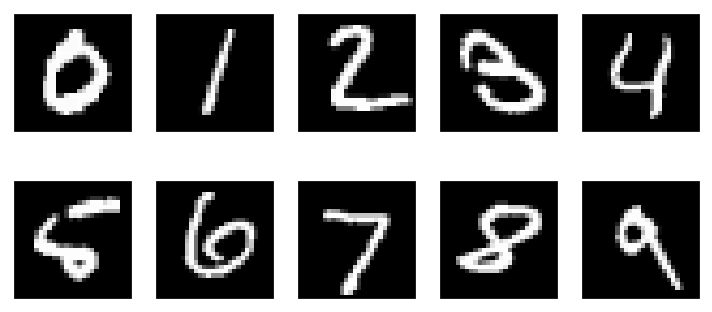

In [3]:
fig, ((ax1, ax2, ax3, ax4, ax5), (ax6, ax7, ax8, ax9, ax10)) = plt.subplots(2, 5, figsize=(10, 5))

for idx, ax in enumerate([ax1, ax2, ax3, ax4, ax5, ax6, ax7, ax8, ax9, ax10]):
    for i in range(1000):
        if y_test[i] == idx:
            ax.imshow(X_test[i], cmap='gray')
            ax.grid(False)
            ax.set_xticks([])
            ax.set_yticks([])
            break
plt.tight_layout()
plt.show()

# Building a simple autoencoder

In [4]:
model = Sequential()

In [5]:
hidden_layer_size = 1
model.add(Dense(units=hidden_layer_size, input_shape=(784,), activation='relu'))

In [6]:
# Output Layer
model.add(Dense(units=784, activation='sigmoid'))

In [7]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 1)                 785       
_________________________________________________________________
dense_2 (Dense)              (None, 784)               1568      
Total params: 2,353
Trainable params: 2,353
Non-trainable params: 0
_________________________________________________________________


In [8]:
# Helper method
def create_basic_autoencoder(hidden_layer_size=1):
    model = Sequential()
    model.add(Dense(units=hidden_layer_size, input_shape=(784,), activation='relu'))
    # Output layer
    model.add(Dense(units=784, activation='sigmoid'))
    
    return model

# hidden_layer_size = 1
# model = create_basic_autoencoder(hidden_layer_size)

# Preprocessing the data

In [ ]:
## Two preprocessing steps 
# 1. Reshape the images from a 28 x 28 vector to a 784 x 1 vector.
# 2. Normalize the values of the vector between 0 and 1 from the current 0 to
#     255. This smaller range of values makes it easier to train our neural
#     network using the data

In [9]:
# X_train.shape[0], refers to the number of samples
X_train_reshaped = X_train.reshape(X_train.shape[0], X_train.shape[1]*X_train.shape[2])

X_test_reshaped = X_test.reshape(X_test.shape[0], X_test.shape[1]*X_test.shape[2])

In [10]:
X_train_reshaped = X_train_reshaped / 255
X_test_reshaped = X_test_reshaped / 255

In [11]:
model.compile(optimizer='adam', loss='mean_squared_error')

In [12]:
model.fit(X_train_reshaped, X_train_reshaped, epochs=10)



Epoch 1/10
60000/60000 [==============================] - 4s 68us/step - loss: 0.0750
Epoch 2/10
60000/60000 [==============================] - 3s 58us/step - loss: 0.0654
Epoch 3/10
60000/60000 [==============================] - 3s 56us/step - loss: 0.0642
Epoch 4/10
60000/60000 [==============================] - 3s 57us/step - loss: 0.0636
Epoch 5/10
60000/60000 [==============================] - 3s 56us/step - loss: 0.0632
Epoch 6/10
60000/60000 [==============================] - 3s 57us/step - loss: 0.0629
Epoch 7/10
60000/60000 [==============================] - 3s 57us/step - loss: 0.0625
Epoch 8/10
60000/60000 [==============================] - 4s 61us/step - loss: 0.0620
Epoch 9/10
60000/60000 [==============================] - 3s 58us/step - loss: 0.0616
Epoch 10/10
60000/60000 [==============================] - 4s 61us/step - loss: 0.0613


In [13]:
output = model.predict(X_test_reshaped)

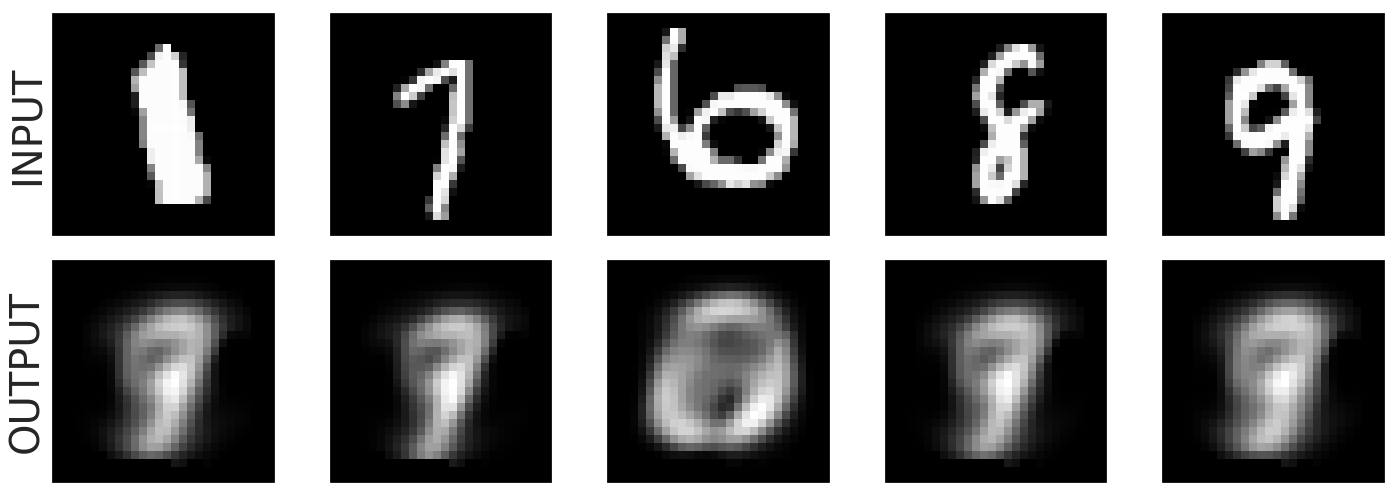

In [14]:
fig, ((ax1, ax2, ax3, ax4, ax5), (ax6, ax7, ax8, ax9, ax10)) = plt.subplots(2, 5, figsize=(20, 7))

# randomly select 5 images
randomly_selected_imgs = random.sample(range(output.shape[0]), 5)

# plot original images (input) on top row
for i, ax in enumerate([ax1, ax2, ax3, ax4, ax5]):
    ax.imshow(X_test[randomly_selected_imgs[i]], cmap='gray')
    if i == 0:
        ax.set_ylabel("INPUT", size=40)
    ax.grid(False)
    ax.set_xticks([])
    ax.set_yticks([])

#     plot output images from our autoencoder on the bottom row
for i, ax in enumerate([ax6, ax7, ax8, ax9, ax10]):
    ax.imshow(output[randomly_selected_imgs[i]].reshape(28, 28), cmap='gray')
    if i == 0:
        ax.set_ylabel("OUTPUT", size=40)
    ax.grid(False)
    ax.set_xticks([])
    ax.set_yticks([])

plt.tight_layout()
plt.show()

In [ ]:
## Insight: 
# The output images look terrible! They look like a blurry white
# scribble and they look nothing like our original input images. Clearly, an
# autoencoder with a hidden layer size of one node is insufficient to encode this
# dataset. This latent representation is too small for our autoencoder to
# sufficiently capture the salient features of our data

In [15]:
# Increasing the hidden layer to check the autoencoders result
hidden_layer_size_2_model = create_basic_autoencoder(hidden_layer_size=2)
hidden_layer_size_4_model = create_basic_autoencoder(hidden_layer_size=4)
hidden_layer_size_8_model = create_basic_autoencoder(hidden_layer_size=8)
hidden_layer_size_16_model = create_basic_autoencoder(hidden_layer_size=16)
hidden_layer_size_32_model = create_basic_autoencoder(hidden_layer_size=32)

In [16]:
hidden_layer_size_2_model.compile(optimizer='adam', loss='mean_squared_error')

hidden_layer_size_2_model.fit(X_train_reshaped, X_train_reshaped, epochs=10, verbose=0)

hidden_layer_size_4_model.compile(optimizer='adam', loss='mean_squared_error')

hidden_layer_size_4_model.fit(X_train_reshaped, X_train_reshaped, epochs=10, verbose=0)

hidden_layer_size_8_model.compile(optimizer='adam', loss='mean_squared_error')

hidden_layer_size_8_model.fit(X_train_reshaped, X_train_reshaped, epochs=10, verbose=0)

hidden_layer_size_16_model.compile(optimizer='adam', loss='mean_squared_error')

hidden_layer_size_16_model.fit(X_train_reshaped, X_train_reshaped, epochs=10, verbose=0)

hidden_layer_size_32_model.compile(optimizer='adam', loss='mean_squared_error')

hidden_layer_size_32_model.fit(X_train_reshaped, X_train_reshaped, epochs=10, verbose=0)

In [17]:
output_2_model = hidden_layer_size_2_model.predict(X_test_reshaped)
output_4_model = hidden_layer_size_4_model.predict(X_test_reshaped)
output_8_model = hidden_layer_size_8_model.predict(X_test_reshaped)
output_16_model = hidden_layer_size_16_model.predict(X_test_reshaped)
output_32_model = hidden_layer_size_32_model.predict(X_test_reshaped)

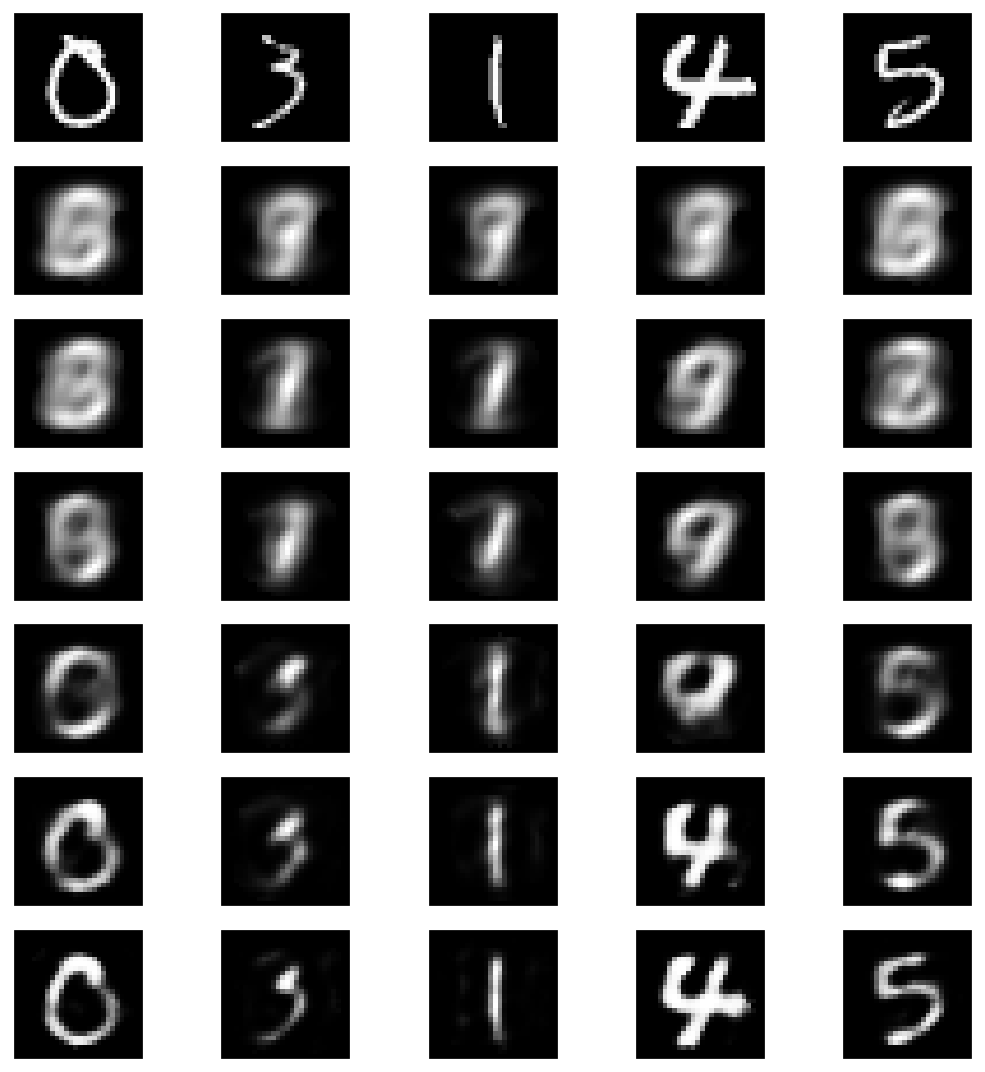

In [18]:
fig, axes = plt.subplots(7, 5, figsize=(15, 15))

randomly_selected_imgs = random.sample(range(output.shape[0]), 5)

outputs = [X_test, output, output_2_model, output_4_model, output_8_model, output_16_model, output_32_model]

# Iterate through each subplot and plot accordingly
for row_num, row in enumerate(axes):
    for col_num, ax in enumerate(row):
        ax.imshow(outputs[row_num][randomly_selected_imgs[col_num]].reshape(28, 28), cmap='gray')
        
        ax.grid(False)
        ax.set_xticks([])
        ax.set_yticks([])

plt.tight_layout()
plt.show()

In [16]:
# adding noise to MNIST dataset

X_train_noisy = X_train_reshaped + np.random.normal(0, 0.5, size=X_train_reshaped.shape)

X_test_noisy = X_test_reshaped + np.random.normal(0, 0.5, size=X_test_reshaped.shape)

In [17]:
# we clip the noisy images between 0 and 1 to normalize the images
X_train_noisy = np.clip(X_train_noisy, a_min=0, a_max=1)
X_test_noisy = np.clip(X_test_noisy, a_min=0, a_max=1)

In [21]:
# basic autoencoder has a single hidden layer with 16 nodes
basic_denoise_autoencoder = create_basic_autoencoder(hidden_layer_size=16)

In [22]:
basic_denoise_autoencoder.compile(optimizer='adam', loss='mean_squared_error')

# The input to the basic denoising autoencoder is a noisy image and the output is a clean image
basic_denoise_autoencoder.fit(X_train_noisy, X_train_reshaped, epochs=10)

Epoch 1/10
60000/60000 [==============================] - 5s 88us/step - loss: 0.0473
Epoch 2/10
60000/60000 [==============================] - 5s 78us/step - loss: 0.0312
Epoch 3/10
60000/60000 [==============================] - 5s 81us/step - loss: 0.0300
Epoch 4/10
60000/60000 [==============================] - 5s 82us/step - loss: 0.0298
Epoch 5/10
60000/60000 [==============================] - 5s 81us/step - loss: 0.0296
Epoch 6/10
60000/60000 [==============================] - 5s 81us/step - loss: 0.0295
Epoch 7/10
60000/60000 [==============================] - 5s 80us/step - loss: 0.0294
Epoch 8/10
60000/60000 [==============================] - 5s 88us/step - loss: 0.0293
Epoch 9/10
60000/60000 [==============================] - 5s 81us/step - loss: 0.0292
Epoch 10/10
60000/60000 [==============================] - 5s 79us/step - loss: 0.0291


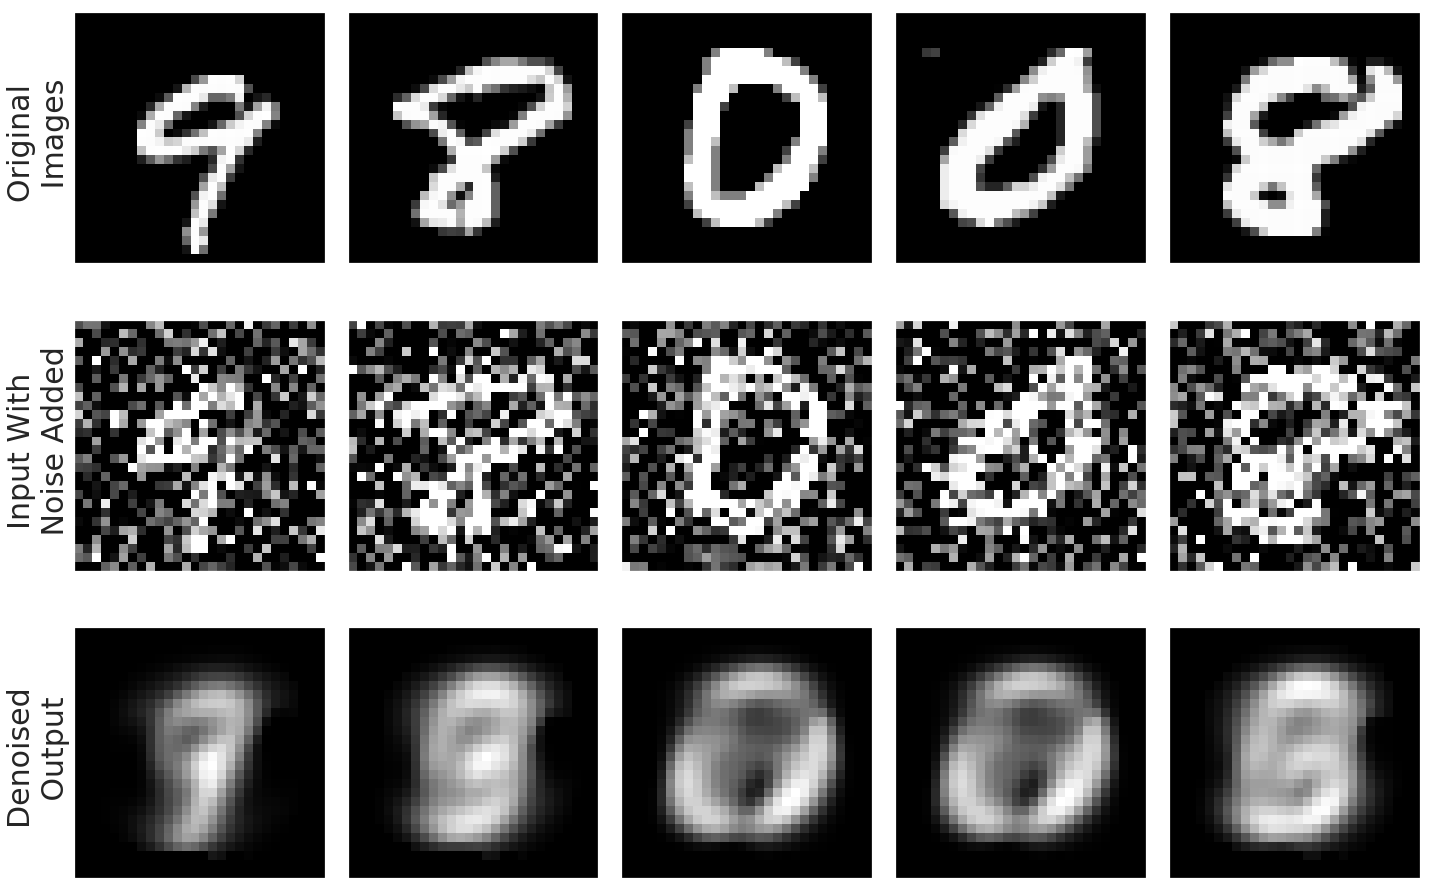

In [23]:
fig, ((ax1, ax2, ax3, ax4, ax5), (ax6, ax7, ax8, ax9, ax10), (ax11, ax12, ax13, ax14, ax15)) = plt.subplots(3, 5, figsize=(20, 13))

# randomly select 5 images
randomly_selected_imgs = random.sample(range(output.shape[0]), 5)

# 1st row to plot original images (input)
for i, ax in enumerate([ax1, ax2, ax3, ax4, ax5]):
    ax.imshow(X_test_reshaped[randomly_selected_imgs[i]].reshape(28, 28), cmap='gray')
    if i == 0:
        ax.set_ylabel("Original \n Images", size=30)
    ax.grid(False)
    ax.set_xticks([])
    ax.set_yticks([])

# 2nd row to plot original images (input) with noise added
for i, ax in enumerate([ax6, ax7, ax8, ax9, ax10]):
    ax.imshow(X_test_noisy[randomly_selected_imgs[i]].reshape(28, 28), cmap='gray')
    if i == 0:
        ax.set_ylabel("Input With \n Noise Added", size=30)
    ax.grid(False)
    ax.set_xticks([])
    ax.set_yticks([])

# 3rd row to plot Output images from autoencoder
for i, ax in enumerate([ax11, ax12, ax13, ax14, ax15]):
    ax.imshow(output[randomly_selected_imgs[i]].reshape(28, 28), cmap='gray')
    if i == 0:
        ax.set_ylabel("Denoised \n Output", size=30)
    ax.grid(False)
    ax.set_xticks([])
    ax.set_yticks([])

plt.tight_layout()
plt.show()

In [ ]:
## Insight:
# This basic denoising autoencoder is perfectly capable of removing noise, but it doesn't do a very
# good job at reconstructing the original image. We can see that this basic denoising autoencoder 
# sometimes fails to separate noise from the digits, especially near the center of the image

# Deep convolutional denoising autoencoder

![deep convolutional_autoencoder](images/deep_convolutional_autoencoder.png)

In [11]:
conv_autoencoder = Sequential()

In [ ]:
# First two convolutional layers
## Number of filters: 
# Typically, we use a decreasing number of filters for each layer in the encoder. Conversely, we use an increasing number of
# filters for each layer in the decoder. Let's use 16 filters for the first convolutional layer in the encoder and eight filters 
# for the second convolutional layer in the encoder. Conversely, let's use eight filters for the first convolutional layer in the 
# decoder and 16 filters for the second convolutional layer in the decoder

## Filter size:
# Filter size of 3 x 3 is typical for convolutional layers

## Padding:
# For autoencoders, we use a same padding. This ensures that the height and width of successive layers remains the same. This is
# useful because we need to ensure that the dimensions of the final output is the same as the input.

In [12]:
# Decreasing number of filters for each layer in the encoder
conv_autoencoder.add(Conv2D(filters=16, kernel_size=(3, 3), activation='relu', padding='same', input_shape=(28, 28, 1)))

conv_autoencoder.add(Conv2D(filters=8, kernel_size=(3, 3), activation='relu', padding='same'))

In [13]:
# Increasing number of filters for each layer in the decoder
conv_autoencoder.add(Conv2D(filters=8, kernel_size=(3, 3), activation='relu', padding='same'))

conv_autoencoder.add(Conv2D(filters=16, kernel_size=(3, 3), activation='relu', padding='same'))

In [14]:
# Output Layer
conv_autoencoder.add(Conv2D(filters=1, kernel_size=(3, 3), activation='sigmoid', padding='same'))

In [15]:
conv_autoencoder.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 28, 28, 16)        160       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 28, 28, 8)         1160      
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 28, 28, 8)         584       
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 28, 28, 16)        1168      
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 28, 28, 1)         145       
Total params: 3,217
Trainable params: 3,217
Non-trainable params: 0
_________________________________________________________________


In [18]:
conv_autoencoder.compile(optimizer='adam', loss='binary_crossentropy')
conv_autoencoder.fit(X_train_noisy.reshape(60000, 28, 28, 1), X_train_reshaped.reshape(60000, 28, 28, 1), epochs=10)



Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where

Epoch 1/10
60000/60000 [==============================] - 27s 454us/step - loss: 0.1224
Epoch 2/10
60000/60000 [==============================] - 26s 440us/step - loss: 0.1014
Epoch 3/10
60000/60000 [==============================] - 26s 439us/step - loss: 0.1000
Epoch 4/10
60000/60000 [==============================] - 26s 440us/step - loss: 0.0992
Epoch 5/10
60000/60000 [==============================] - 26s 434us/step - loss: 0.0987
Epoch 6/10
60000/60000 [==============================] - 26s 438us/step - loss: 0.0984
Epoch 7/10
60000/60000 [==============================] - 24s 396us/step - loss: 0.0981
Epoch 8/10
60000/60000 [==============================] - 25s 415us/step - loss: 0.0979
Epoch 9/10
60000/60000 [==============================] - 21s 352us/step - loss: 0.0977
Epoch 10/10
60000/60000 [==============================] - 21s 348us/step - loss: 0.0975


In [20]:
output = conv_autoencoder.predict(X_test_noisy.reshape(10000, 28, 28, 1))

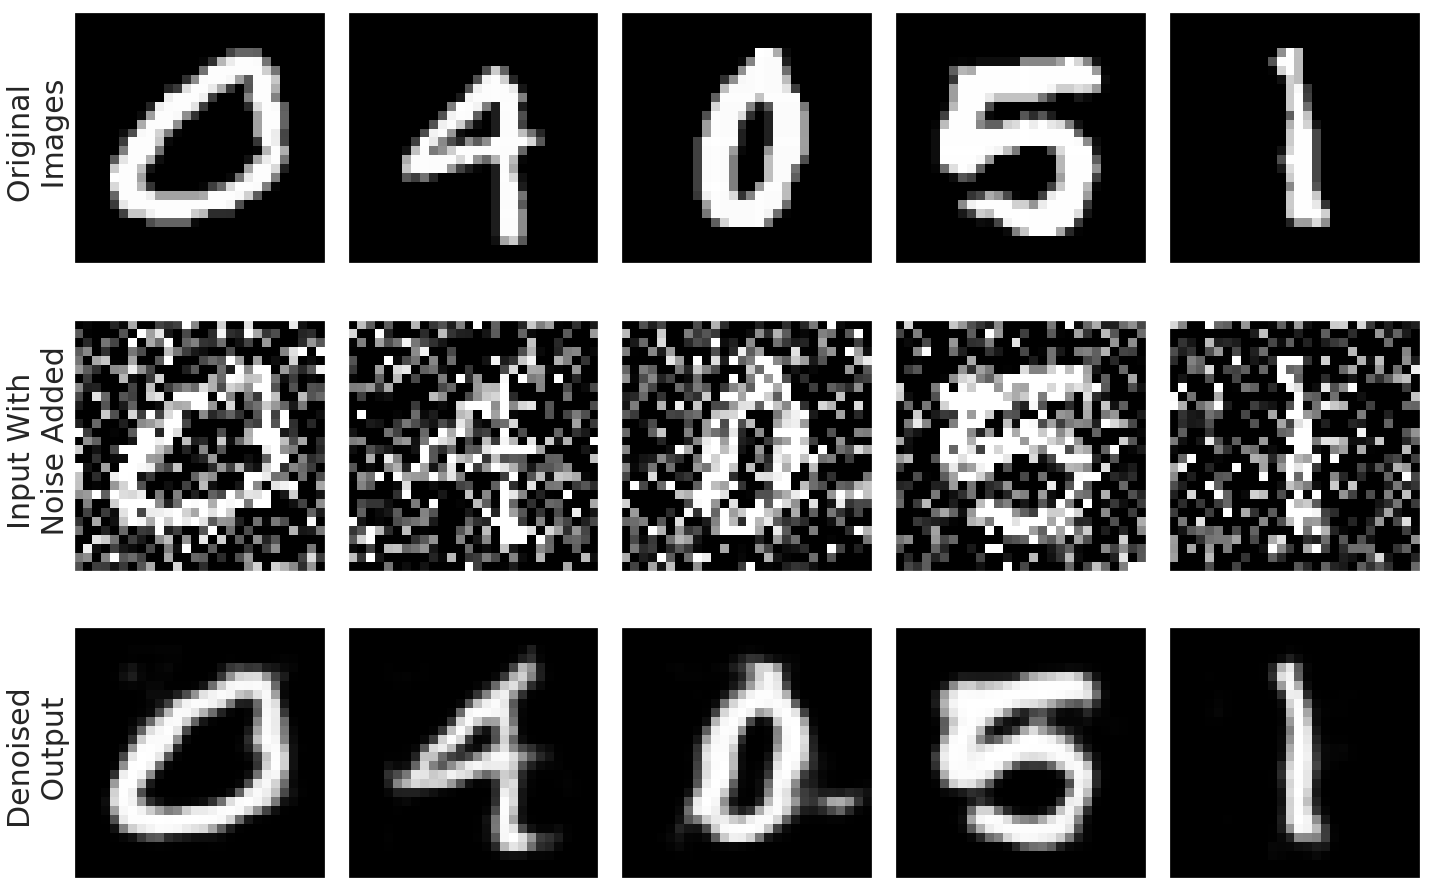

In [21]:
fig, ((ax1, ax2, ax3, ax4, ax5), (ax6, ax7, ax8, ax9, ax10), (ax11, ax12, ax13, ax14, ax15)) = plt.subplots(3, 5, figsize=(20, 13))

# randomly select 5 images
randomly_selected_imgs = random.sample(range(output.shape[0]), 5)

# 1st row to plot original images (input)
for i, ax in enumerate([ax1, ax2, ax3, ax4, ax5]):
    ax.imshow(X_test_reshaped[randomly_selected_imgs[i]].reshape(28, 28), cmap='gray')
    if i == 0:
        ax.set_ylabel("Original \n Images", size=30)
    ax.grid(False)
    ax.set_xticks([])
    ax.set_yticks([])

# 2nd row to plot original images (input) with noise added
for i, ax in enumerate([ax6, ax7, ax8, ax9, ax10]):
    ax.imshow(X_test_noisy[randomly_selected_imgs[i]].reshape(28, 28), cmap='gray')
    if i == 0:
        ax.set_ylabel("Input With \n Noise Added", size=30)
    ax.grid(False)
    ax.set_xticks([])
    ax.set_yticks([])

# 3rd row to plot Output images from autoencoder
for i, ax in enumerate([ax11, ax12, ax13, ax14, ax15]):
    ax.imshow(output[randomly_selected_imgs[i]].reshape(28, 28), cmap='gray')
    if i == 0:
        ax.set_ylabel("Denoised \n Output", size=30)
    ax.grid(False)
    ax.set_xticks([])
    ax.set_yticks([])

plt.tight_layout()
plt.show()

# Denoising documents with autoencoders

In [ ]:
# Better represents the challenges of denoising documents in real life. The dataset 
# that we will be using is provided for free by the University of California Irvine (UCI). 

In [ ]:
## Dataset Detail
# The dataset consists of 216 different noisy images. The noisy images are
# scanned office documents that are tainted by coffee stains, wrinkled marks,
# and other sorts of defects that are typical in office documents. For every noisy
# image, a corresponding reference clean image is provided, which represents
# the office document in an ideal noiseless state.

In [23]:
BASE_DIR = os.getcwd() # Getting current working directories
src_folder = f'{BASE_DIR}'

In [26]:
noisy_imgs_path = src_folder + '/data/noisy/'
clean_imgs_path = src_folder + '/data/clean/'

In [29]:
X_train_noisy = []

for file in sorted(os.listdir(noisy_imgs_path)):
    img = load_img(noisy_imgs_path + file, color_mode='grayscale', target_size=(420, 540))
    img = img_to_array(img).astype('float32') / 255
    
    X_train_noisy.append(img)

# Convert to numpy array
X_train_noisy = np.array(X_train_noisy)

In [30]:
X_train_noisy.shape

(216, 420, 540, 1)

In [ ]:
# (216, 420, 540, 1)
# images, width, height, number of channels for each images

In [31]:
X_train_clean = []

for file in sorted(os.listdir(clean_imgs_path)):
    img = load_img(clean_imgs_path + file, color_mode='grayscale', target_size=(420, 540))
    img = img_to_array(img).astype('float32') / 255
    
    X_train_clean.append(img)

# Convert to numpy array
X_train_clean = np.array(X_train_clean)

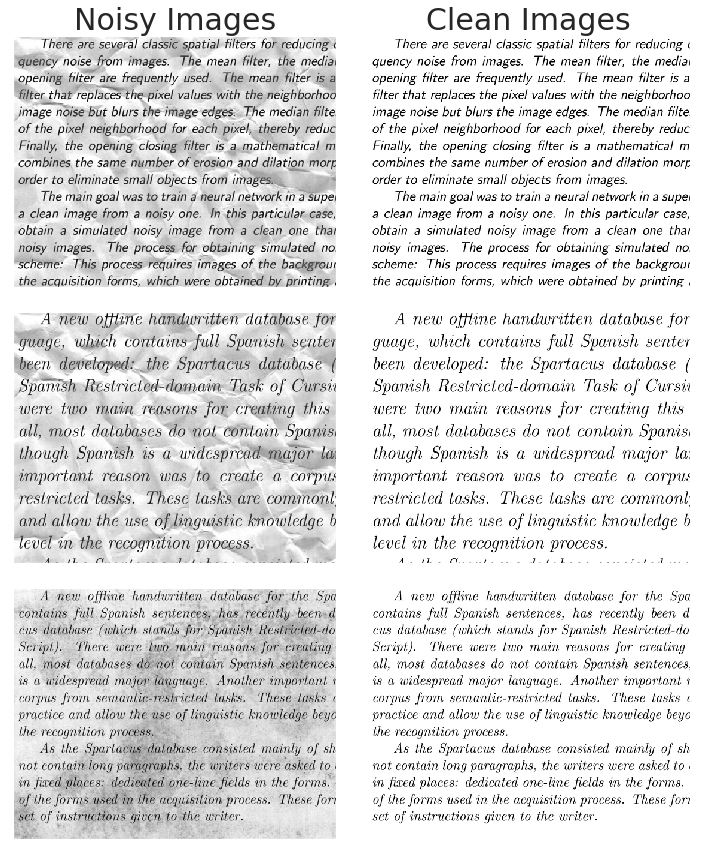

In [32]:
fig, ((ax1, ax2), (ax3, ax4), (ax5, ax6)) = plt.subplots(3, 2, figsize=(10, 12))

randomly_selected_imgs = random.sample(range(X_train_noisy.shape[0]), 3)

# plot noisy images on the left
for idx, ax in enumerate([ax1, ax3, ax5]):
    ax.imshow(X_train_noisy[idx].reshape(420, 540), cmap='gray')
    if idx == 0:
        ax.set_title("Noisy Images", size=30)
    ax.grid(False)
    ax.set_xticks([])
    ax.set_yticks([])

# plot clean images on the right
for idx, ax in enumerate([ax2, ax4, ax6]):
    ax.imshow(X_train_clean[idx].reshape(420, 540), cmap='gray')
    if idx == 0:
        ax.set_title("Clean Images", size=30)
    ax.grid(False)
    ax.set_xticks([])
    ax.set_yticks([])

plt.tight_layout()
plt.show()

## Train & Test Set split

In [33]:
# Use the first 20 noisy images as tesing images
X_test_noisy = X_train_noisy[0:20,]
X_train_noisy = X_train_noisy[21:,]

# Use the first 20 clean images as tesing images
X_test_clean = X_train_clean[0:20,]
X_train_clean = X_train_clean[21:,]

In [34]:
basic_conv_autoencoder = Sequential()

In [36]:
basic_conv_autoencoder.add(Conv2D(filters=8, kernel_size=(3, 3), activation='relu', padding='same', input_shape=(420, 540, 1)))

In [37]:
basic_conv_autoencoder.add(Conv2D(filters=8, kernel_size=(3, 3), activation='relu', padding='same'))

In [38]:
# Output layer
basic_conv_autoencoder.add(Conv2D(filters=1, kernel_size=(3, 3), activation='sigmoid', padding='same'))

In [39]:
basic_conv_autoencoder.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 420, 540, 8)       80        
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 420, 540, 8)       584       
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 420, 540, 1)       73        
Total params: 737
Trainable params: 737
Non-trainable params: 0
_________________________________________________________________


In [40]:
basic_conv_autoencoder.compile(optimizer='adam', loss='binary_crossentropy')
basic_conv_autoencoder.fit(X_train_noisy, X_train_clean, epochs=10)

Epoch 1/10
195/195 [==============================] - 8s 40ms/step - loss: 0.6851
Epoch 2/10
195/195 [==============================] - 7s 38ms/step - loss: 0.6162
Epoch 3/10
195/195 [==============================] - 7s 36ms/step - loss: 0.5555
Epoch 4/10
195/195 [==============================] - 7s 36ms/step - loss: 0.4880
Epoch 5/10
195/195 [==============================] - 7s 37ms/step - loss: 0.4152
Epoch 6/10
195/195 [==============================] - 7s 37ms/step - loss: 0.3498
Epoch 7/10
195/195 [==============================] - 7s 35ms/step - loss: 0.3031
Epoch 8/10
195/195 [==============================] - 7s 36ms/step - loss: 0.2769
Epoch 9/10
195/195 [==============================] - 7s 35ms/step - loss: 0.2624
Epoch 10/10
195/195 [==============================] - 7s 36ms/step - loss: 0.2461


In [41]:
output = basic_conv_autoencoder.predict(X_test_noisy)

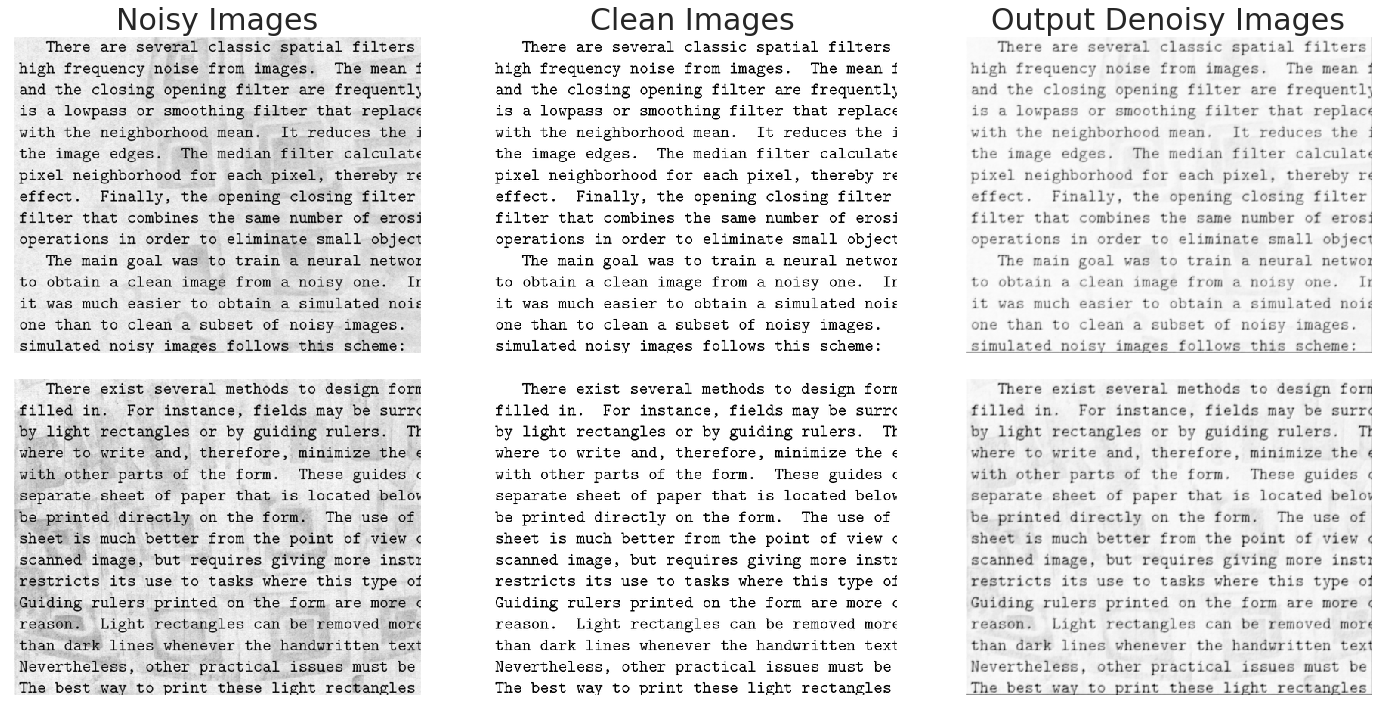

In [42]:
fig, ((ax1, ax2, ax3), (ax4, ax5, ax6)) = plt.subplots(2, 3, figsize=(20, 10))

randomly_selected_imgs = random.sample(range(X_test_noisy.shape[0]), 2)

# plot noisy images on the left
for i, ax in enumerate([ax1, ax4]):
    idx = randomly_selected_imgs[i]
    ax.imshow(X_test_noisy[idx].reshape(420, 540), cmap='gray')
    if i == 0:
        ax.set_title("Noisy Images", size=30)
    ax.grid(False)
    ax.set_xticks([])
    ax.set_yticks([])

# plot clean images on the middle
for i, ax in enumerate([ax2, ax5]):
    idx = randomly_selected_imgs[i]
    ax.imshow(X_test_clean[idx].reshape(420, 540), cmap='gray')
    if i == 0:
        ax.set_title("Clean Images", size=30)
    ax.grid(False)
    ax.set_xticks([])
    ax.set_yticks([])

# plot denoised images on the right
for i, ax in enumerate([ax3, ax6]):
    idx = randomly_selected_imgs[i]
    ax.imshow(output[idx].reshape(420, 540), cmap='gray')
    if i == 0:
        ax.set_title("Output Denoisy Images", size=30)
    ax.grid(False)
    ax.set_xticks([])
    ax.set_yticks([])

plt.tight_layout()
plt.show()

# Deep convolutional autoencoder for Denoising documents

In [43]:
conv_autoencoder = Sequential()

In [44]:
# 1st  encoder
conv_autoencoder.add(Conv2D(filters=32, kernel_size=(3, 3), input_shape=(420, 540, 1), activation='relu', padding='same'))
# 2nd encoder
conv_autoencoder.add(Conv2D(filters=16, kernel_size=(3, 3), activation='relu', padding='same'))
# 3rd encoder
conv_autoencoder.add(Conv2D(filters=8, kernel_size=(3, 3), activation='relu', padding='same'))

In [45]:
# 1st  decoder
conv_autoencoder.add(Conv2D(filters=8, kernel_size=(3, 3), activation='relu', padding='same'))
# 2nd decoder
conv_autoencoder.add(Conv2D(filters=16, kernel_size=(3, 3), activation='relu', padding='same'))
# 3rd decoder
conv_autoencoder.add(Conv2D(filters=32, kernel_size=(3, 3), activation='relu', padding='same'))

In [46]:
# Output layer
conv_autoencoder.add(Conv2D(filters=1, kernel_size=(3, 3), activation='sigmoid', padding='same'))

In [47]:
conv_autoencoder.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 420, 540, 32)      320       
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 420, 540, 16)      4624      
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 420, 540, 8)       1160      
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 420, 540, 8)       584       
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 420, 540, 16)      1168      
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 420, 540, 32)      4640      
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 420, 540, 1)       289       
Total para

In [49]:
conv_autoencoder.compile(optimizer='adam', loss='binary_crossentropy')
conv_autoencoder.fit(X_train_noisy, X_train_clean, epochs=10)

Epoch 1/10
195/195 [==============================] - 27s 139ms/step - loss: 0.6563
Epoch 2/10
195/195 [==============================] - 25s 129ms/step - loss: 0.3963
Epoch 3/10
195/195 [==============================] - 27s 138ms/step - loss: 0.3367
Epoch 4/10
195/195 [==============================] - 26s 132ms/step - loss: 0.3058
Epoch 5/10
195/195 [==============================] - 27s 137ms/step - loss: 0.2847
Epoch 6/10
195/195 [==============================] - 28s 143ms/step - loss: 0.2666
Epoch 7/10
195/195 [==============================] - 28s 145ms/step - loss: 0.2387
Epoch 8/10
195/195 [==============================] - 29s 149ms/step - loss: 0.2089
Epoch 9/10
195/195 [==============================] - 29s 146ms/step - loss: 0.1814
Epoch 10/10
195/195 [==============================] - 28s 144ms/step - loss: 0.1552


In [50]:
output = conv_autoencoder.predict(X_test_noisy)

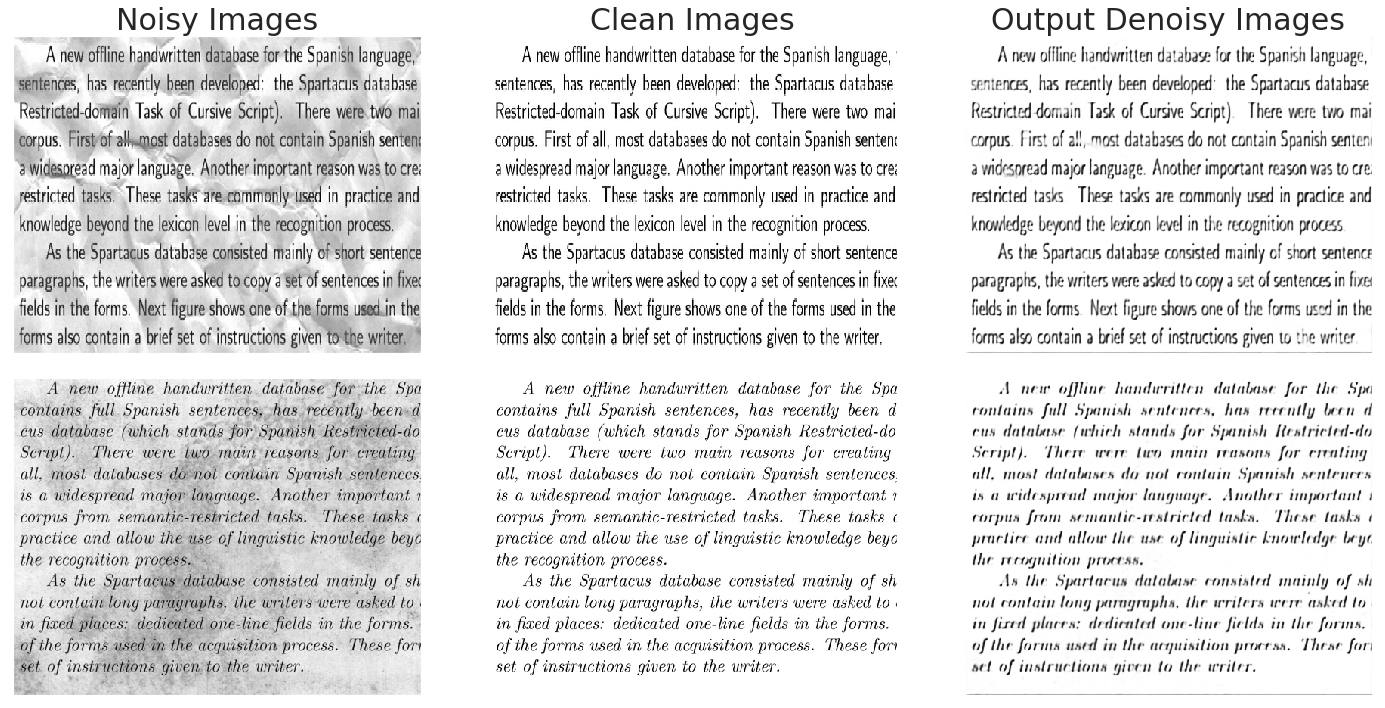

In [51]:
fig, ((ax1, ax2, ax3), (ax4, ax5, ax6)) = plt.subplots(2, 3, figsize=(20, 10))

randomly_selected_imgs = random.sample(range(X_test_noisy.shape[0]), 2)

# plot noisy images on the left
for i, ax in enumerate([ax1, ax4]):
    idx = randomly_selected_imgs[i]
    ax.imshow(X_test_noisy[idx].reshape(420, 540), cmap='gray')
    if i == 0:
        ax.set_title("Noisy Images", size=30)
    ax.grid(False)
    ax.set_xticks([])
    ax.set_yticks([])

# plot clean images on the middle
for i, ax in enumerate([ax2, ax5]):
    idx = randomly_selected_imgs[i]
    ax.imshow(X_test_clean[idx].reshape(420, 540), cmap='gray')
    if i == 0:
        ax.set_title("Clean Images", size=30)
    ax.grid(False)
    ax.set_xticks([])
    ax.set_yticks([])

# plot denoised images on the right
for i, ax in enumerate([ax3, ax6]):
    idx = randomly_selected_imgs[i]
    ax.imshow(output[idx].reshape(420, 540), cmap='gray')
    if i == 0:
        ax.set_title("Output Denoisy Images", size=30)
    ax.grid(False)
    ax.set_xticks([])
    ax.set_yticks([])

plt.tight_layout()
plt.show()